<a href="https://colab.research.google.com/github/DESOLATE17/ML/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для выполнения этого задания выберем датасет "Titanic" с Kaggle, который содержит информацию о пассажирах на борту "Титаника" и является классическим примером задачи классификации. Задача состоит в том, чтобы предсказать выживание пассажира на основе различных признаков, таких как пол, возраст, класс пассажира и т.д.



1. Загрузка датасета: Сначала загрузим датасет "Titanic" с Kaggle.
2. Удаление пропусков: В датасете могут быть пропуски в данных, которые нужно обработать. Например, мы можем удалить строки с пропущенными значениями или заполнить их средним значением.
3. Кодирование категориальных признаков: Признаки, такие как пол и класс пассажира, являются категориальными и нужно преобразовать их в числовые значения.



### Шаг 1: Загрузка и подготовка данных


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
pd.options.display.float_format = '{:.2f}'.format


train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train['Age_Mode'] = train['Age'].fillna(value = 24)
train['Age_Med'] = train['Age'].fillna(train['Age'].median())
train['Age_Mean'] = train['Age'].fillna(train['Age'].mean())

In [6]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train = train.drop(columns= ['Age_Mode','Age_Med','Age_Mean'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [7]:
le = LabelEncoder()
train['Name'] = le.fit_transform(train['Name'])
encoded_values = train['Name'].unique()
decoded_values = le.inverse_transform(encoded_values)
initials = {}
for i in range(len(encoded_values)):
    initials.setdefault(decoded_values[i],encoded_values[i])

train['Name'] = le.inverse_transform(train['Name'])

In [8]:
train['Name'] = le.fit_transform(train['Name'])
train['Sex'] = le.fit_transform(train['Sex'])
embarked = {0:'S',1:'C',2:'Q'}
train['Embarked'] = train['Embarked'].fillna('Q')
train['Embarked'] = le.fit_transform(train['Embarked'])

In [9]:
train = train.drop(columns = ['PassengerId','Ticket','Cabin'])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,108,1,22.00,1,0,7.25,2
1,1,1,190,0,38.00,1,0,71.28,0
2,1,3,353,0,26.00,0,0,7.92,2
3,1,1,272,0,35.00,1,0,53.10,2
4,0,3,15,1,35.00,0,0,8.05,2


In [10]:
train = train.drop(columns = ['Embarked','SibSp','Parch'])
train.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,108,1,22.00,7.25
1,1,1,190,0,38.00,71.28
2,1,3,353,0,26.00,7.92
3,1,1,272,0,35.00,53.10
4,0,3,15,1,35.00,8.05


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = train[['Pclass','Sex','Name','Fare']].values
features = sc.fit_transform(features)
target = train['Survived'].values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 2)

In [13]:
def model(classifier):
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    print("ACCURACY : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("CROSS VALIDATION SCORE : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = 10,scoring = 'accuracy').mean()))
    print("ROC_AUC SCORE : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

Логистическая регрессия

In [14]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors = 3)
model(classifier_knn)

ACCURACY :  76.68%
CROSS VALIDATION SCORE :  76.50%
ROC_AUC SCORE :  74.49%


In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Параметры для поиска
param_grid = {'n_neighbors': range(1, 11)}

# GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best K with GridSearchCV:", grid_search.best_params_)

# RandomizedSearchCV
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(x_train, y_train)
print("Best K with RandomizedSearchCV:", random_search.best_params_)

Best K with GridSearchCV: {'n_neighbors': 8}
Best K with RandomizedSearchCV: {'n_neighbors': 8}


In [16]:
classifier_knn = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'])
model(classifier_knn)

ACCURACY :  77.13%
CROSS VALIDATION SCORE :  79.49%
ROC_AUC SCORE :  74.06%


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Создание и обучение модели
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

y_pred_linear = linear_regression.predict(x_test)

# Вычисление метрик
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"RMSE для линейной регрессии: {rmse_linear}")
print(f"R^2 для линейной регрессии: {r2_linear}")

RMSE для линейной регрессии: 0.3981570130006197
R^2 для линейной регрессии: 0.3458771167290611


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

# Вычисление метрик
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"Точность для SVM: {accuracy_svm}")
print(f"Полнота для SVM: {recall_svm}")
print(f"F-мера для SVM: {f1_svm}")
print(f"Матрица ошибок для SVM: \n{confusion_matrix_svm}")

Точность для SVM: 0.7713004484304933
Полнота для SVM: 0.6304347826086957
F-мера для SVM: 0.6946107784431138
Матрица ошибок для SVM: 
[[114  17]
 [ 34  58]]


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Создание и обучение модели
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

# Предсказание на тестовом наборе
y_pred_tree = decision_tree.predict(x_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print(f"Точность для дерева решений: {accuracy_tree}")
print(f"Полнота для дерева решений: {recall_tree}")
print(f"F-мера для дерева решений: {f1_tree}")
print(f"Матрица ошибок для дерева решений: \n{confusion_matrix_tree}")

Точность для дерева решений: 0.7533632286995515
Полнота для дерева решений: 0.6630434782608695
F-мера для дерева решений: 0.6892655367231638
Матрица ошибок для дерева решений: 
[[107  24]
 [ 31  61]]


In [32]:
decision_tree.feature_importances_

array([0.1053063 , 0.3048323 , 0.31877363, 0.27108777])

<Axes: >

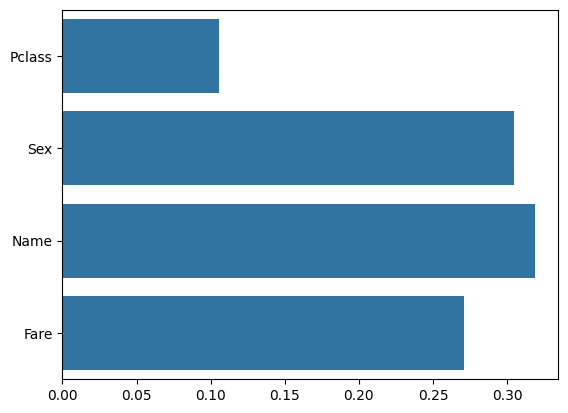

In [35]:
import seaborn  as sns

sns.barplot(y=['Pclass','Sex','Name','Fare'],
            x=decision_tree.feature_importances_)